<IPython.core.display.Javascript object>


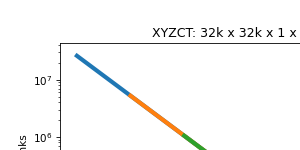

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

x = 2**15
y = 2**15
z = 1
t = 1
c = 25
chunkSizes = [32, 1024]
chunkT = 1
chunkZ = 1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('Length of X and Y (pixels)')
plt.ylabel('Number of chunks')
plt.title("XYZCT: 32k x 32k x 1 x 25 x 1")

def file_count(i, chunkC=1):
    return math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/1) * math.ceil(t/1) * math.ceil(c/chunkC)

numFiles = []
fileSize = []
for i in chunkSizes:
    numFiles.__iadd__([file_count(i)])
    fileSize.__iadd__([i])
ax.plot(fileSize, numFiles, linewidth=4.0)

def scale(scale):
    plt.yscale(scale)
    plt.xscale(scale)

scale('log')
ax.annotate('Chosen chunk size\n256 x 256 pixels',
        xy=((256), file_count(256)), xycoords='data',
        xytext=(0, 40), textcoords='offset points',
        arrowprops=dict(facecolor='black', shrink=0.05),
        horizontalalignment='left', verticalalignment='bottom')
fig.savefig("/tmp/2d-chunks.png", dpi=800)
